# Tarea 3 (Aplicación Distribuciones de Probabilidad)

### 1. Para los datos de INSANUT-2018, filtre los datos para mujeres con edades entre 30 y 59 años; asegúrese que los datos están limpios; y haga lo siguiente:

- a. Obtenga la variable índice de masa corporal: IMC = peso (kg)/ [talla en metros]^2.Nota en la base de datos la talla está en centímetros, así que haga la transformación a metros.
- b. Haga un análisis descriptivo del IMC para las mujeres de esas edades.
- c. Se considera que hay obesidad si IMC≥30.0; obtenga el porcentaje muestral de las mujeres de esa edad que tienen obesidad de acuerdo a este criterio?
- d. Al histograma (relativo) para el IMC ajústele una distribución normal, usando como media y desviación estándar las correspondientes de la muestra del IMC. ¿Qué le parece el IMC sigue una distribución normal?
- e. Con la distribución normal anterior obtenga lo que se pide en el inciso c), y compárelo con el que se obtiene en la muestra. Comente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_excel('EnsanutMediciones.xls')

In [3]:
columnas = ['sexo', 'edad', 'peso', 'talla']
df = df[columnas]

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#### Inciso A

In [4]:
df_mujeres = df[(df['sexo'] == 2) & (df['edad'] >= 30) & (df['edad'] <= 59)]
df_mujeres['imc'] = df_mujeres['peso'] / (df_mujeres['talla'] / 100) ** 2

/tmp/ipykernel_25374/3745657121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mujeres['imc'] = df_mujeres['peso'] / (df_mujeres['talla'] / 100) ** 2


#### Inciso B

In [5]:
df_mujeres['imc'].describe().to_frame()

,imc
count,3289.000000
mean,29.962583
std,5.697167
min,6.380026
25%,26.068266
50%,29.512432
75%,33.189258
max,58.848744


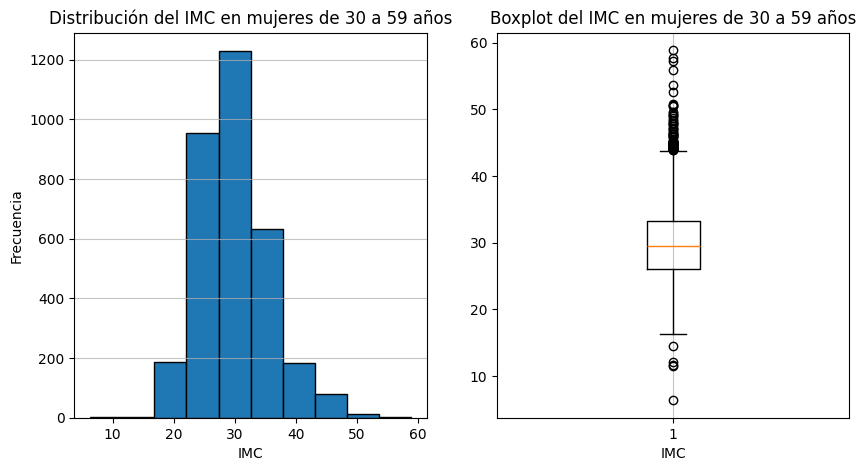

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_mujeres['imc'], edgecolor='black')
plt.title('Distribución del IMC en mujeres de 30 a 59 años')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.boxplot(df_mujeres['imc'])
plt.title('Boxplot del IMC en mujeres de 30 a 59 años')
plt.xlabel('IMC')
plt.grid(axis='x', alpha=0.75)

plt.show()

De acuerdo a los estadicticos observados, podemos decir que el IMC de las mujeres de entre 30 y 59 años tiene una media de 29.96, una desviación estándar es de 5.69, esto de primera mano nos pude indicar que existe un claro sobrepeso en la mayoria de las mujeres entre este rango de edad propuesto, ademas de que la variabilidad es considerable. En cuanto al analisis de los cuantiles y el IQR, podemos ver que existen bastantes valores atipicos en la parte superior, lo cual indica que hay mujeres con un IMC muy elevado, a diferencia de la parte inferior donde no hay tantos valores atipicos, lo cual es bastante negativo en terminos de salud.

#### Inciso C

In [7]:
df_mujeres_obesas = df_mujeres[df_mujeres['imc'] >= 30.0]
porcentaje_obesas = (len(df_mujeres_obesas) / len(df_mujeres)) * 100
print(f'Porcentaje de mujeres con obesidad: {porcentaje_obesas:.2f}%')

Porcentaje de mujeres con obesidad: 46.09%


Retomando lo que deciamos anteriormente, la probabilidad de que una mujer en este rango de edad tenga obesidad (IMC ≥ 30) es aproximadamente del 46%, casi la mitad de la poblacion, lo cual es preocupante.

#### Inciso D

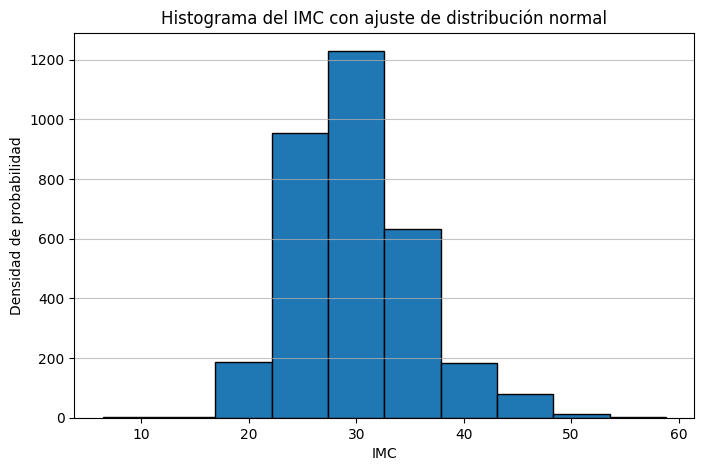

In [8]:
mu, std = df_mujeres['imc'].mean(), df_mujeres['imc'].std()
xmin, xmax = df_mujeres['imc'].min(), df_mujeres['imc'].max()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.figure(figsize=(8, 5))
plt.hist(df_mujeres['imc'], edgecolor='black')
plt.title('Histograma del IMC con ajuste de distribución normal')
plt.xlabel('IMC')
plt.ylabel('Densidad de probabilidad')
plt.grid(axis='y', alpha=0.75)
plt.show()

Viendo la grafica del histograma del IMC junto con la distribucion normal ajustada, podemos observar que la distribucion del IMC no sigue una distribucion normal, ya que presenta una asimetria positiva, ademas de que tiene una cola mas larga en el lado derecho, lo cual indica que hay mas valores atipicos en ese lado.

#### Inciso E

In [9]:
prob_obesidad = 1 - stats.norm.cdf(30.0, mu, std)
print(f'Probabilidad de obesidad según distribución normal: {prob_obesidad * 100:.2f}%')

Probabilidad de obesidad según distribución normal: 49.74%


Y si nos basamos en la distribucion normal ajustada, podemos calcular la probabilidad de obesidad (IMC ≥ 30) utilizando la función de distribución acumulativa (CDF) de la distribución normal. La probabilidad obtenida es aproximadamente del 49.75%, lo cual es un poco mayor que la probabilidad obtenida a partir de la muestra (46%). 

---

### 2. Se afirma que el 30% de los alumnos de una escuela grande son usuarios de una plataforma. Se toma una muestra de 200 alumnos, e interesa los estudiantes usuarios de la plataforma.
- a. Señale en este caso quien es la población, la muestra y la variable de interés (X).
- b. Explique con sus palabras porque el valor de a variable de interés es aleatorio.
- c. ¿Qué distribución de probabilidad es la candidata a modelar a X? Argumente.
- d. ¿Cuál es la media y la desviación estándar de la distribución propuesta?
- e. Represente gráficamente la función de probabilidad, y señale los aspectos más importantes en cuanto a tendencia central, variabilidad y forma de la distribución de X.
- f. Obtenga un intervalo de probabilidad, [LI, LS] con una cobertura mayor o igual a 0.95 de probabilidad para los valores de X, es decir P(LI≤ X ≤LS)≥0.95.
- g. Repita lo anterior pero ahora que el intervalo tenga una cobertura mayor o igual a 0.90.
- h. ¿Cuál es la probabilidad de que de los 200 alumnos de la muestra más del 35% sean usuarios de la plataforma?
- i. ¿Cuál es la probabilidad de que de los 200 alumnos de la muestra menos del 25% sean usuarios de la plataforma?
- j. Como puede ver todas las preguntas anteriores van orientadas a caracterizar la variación esperada de la muestra, ¿qué pasaría si al obtener una muestra, la proporción de usuarios de la plataforma en la misma está muy fuera de los valores esperados, y que se han indicado en incisos anteriores?

#### Inciso A
Para este caso, la poblacion seria todos los alumnos de la escuela, la muestra son los 200 alumnos que se tomaron para el estudio y la variable de interes es la cantidad de alumnos que son usuarios de dicha plataforma.

#### Inciso B
El valor de la variable puede ser aleatorio debido a que estamos extrayendo muestras aleatorias para nuestro estudio, en el caso de que tuvieramos la poblacion completa, el resultado siempre seria el mismo, pero al realizar pequeñas muestras que sean lo suficientemente parecidas a la poblacion, los resultados pueden variar en funcion a como se haya hecho el ejercicio de muestreo. Entre menos sesgo exista, mayor sera la similaridad de los resultados de la muestra y poblacion, pero no serán iguales.

#### Inciso C
Nuestro objetivo es saber si un alumno es usuario de una plataforma o no, por lo que tenemos unicamente dos posibles resultados. Teniendo en cuenta que solamente se nos proporcionó el tamaño de la muestra, la probabilidad, y que solo tenemos dos clases en nuestra clasificacion, lo ideal es utilizar una distribucion binomial.

#### Inciso D

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 200
p = 0.3

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

print(f'Media: {mu}')
print(f'Desviación estándar: {sigma}')

Media: 60.0
Desviación estándar: 6.48074069840786


Siguiendo lo que indica una distribucion binomial, tenemos que la media para nuestra distribucion es de 60 y la desviacion estandar es de 6.48.

#### Inciso E

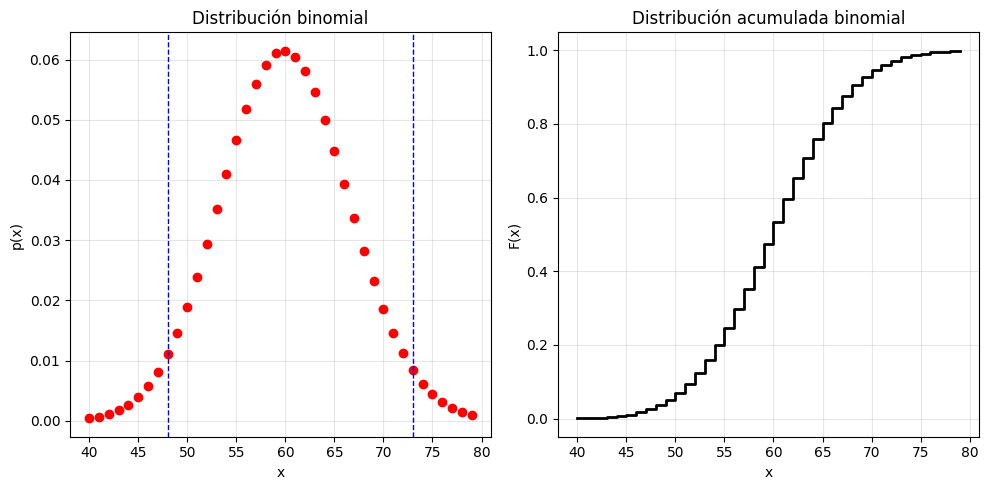

In [11]:
# Cuantiles
q025 = binom.ppf(0.025, n, p)
q975 = binom.ppf(0.975, n, p)

x = np.arange(40, 80, 1)

# Grafica de distribucion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, binom.pmf(x, n, p), 'ro', markersize=6)
plt.axvline(x=q025, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=q975, color='blue', linestyle='--', linewidth=1)
plt.ylabel('p(x)')
plt.xlabel('x')
plt.title('Distribución binomial')
plt.grid(alpha=0.3)

# Grafica de la acumulada
plt.subplot(1, 2, 2)
plt.step(x, binom.cdf(x, n, p), where='post', color='black', linewidth=2)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('Distribución acumulada binomial')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
import scipy.stats as stats

media = np.mean(x)
mediana = np.median(x)
moda = stats.mode(x)
varianza = np.var(x)
desviacion = np.std(x)
rango = np.max(x) - np.min(x)

print('Análisis de la muestra:')
print(f'Media: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda.mode}')
print(f'Varianza: {varianza}')
print(f'Desviación estándar: {desviacion}')
print(f'Rango: {rango}')
quantiles = np.percentile(x, [25, 50, 75])
print(f'Quantiles (25%, 50%, 75%): {quantiles}')

Análisis de la muestra:
Media: 59.5
Mediana: 59.5
Moda: 40
Varianza: 133.25
Desviación estándar: 11.543396380615196
Rango: 39
Quantiles (25%, 50%, 75%): [49.75 59.5  69.25]


#### Inciso F

In [13]:
Li_95 = round(max(mu - 2*sigma, 0))
Ls_95 = round(mu + 2*sigma)
print(f'Limite inferior: {Li_95}')
print(f'Limite superior: {Ls_95}')

Limite inferior: 47
Limite superior: 73


#### Inciso G

In [14]:
Li_90 = round(max(mu - 1.645*sigma, 0))
Ls_90 = round(mu + 1.645*sigma)
print(f'Limite inferior (90%): {Li_90}')
print(f'Limite superior (90%): {Ls_90}')

Limite inferior (90%): 49
Limite superior (90%): 71


#### Inciso H

In [15]:
p_mas_35 = 1 - binom.cdf(0.35 * n, n, p)
print(f'Probabilidad de que más del 35% sean usuarios: {p_mas_35:.4f}')

Probabilidad de que más del 35% sean usuarios: 0.0542


#### Inciso I

In [16]:
p_menos_25 = binom.cdf(0.25 * n, n, p)
print(f'Probabilidad de que menos del 25% sean usuarios: {p_menos_25:.4f}')

Probabilidad de que menos del 25% sean usuarios: 0.0695


#### Inciso J
Si vemos una muestra con valores fuera de los rangos vistos anteriormente, podria ser indicativo de que la muestra no fue realizada de manera adecuada, ya que, aunque al inicio de este problema comentamos que siempre puede haber variablidad, estos estudios de distribuciones y probabilidades nos ayudan a saber donde es que deverian estar los estadisticos de nuestra muestra. Pese a que estos valores no son definitivos, si son una guia que debemos de tomar en cuenta para verificar que nuestro muestreo esté bien hecho. Tambien depende mucho de cual sea la diferencia entre el valor resultante de esa muestra atipica, ya que tenemos cierto margen de error, pero por lo general deberiamos de ver resultados cercanos a lo anteriormente visto,

---

### 3. Una empresa de comercio electrónico ha recopilado un gran conjunto de datos sobre las compras realizadas en su plataforma durante el último año. Se desea analizar la frecuencia con la que los usuarios realizan compras repetidas en un trimestre determinado, e identifican que en promedio hacen 4 compras. Suponiendo una distribución Poisson, conteste las siguientes preguntas.
- a. Señale en este caso quien es la población, la muestra y la variable de interés (X).
- b. ¿Qué puede decir de la tendencia central, variabilidad y forma de la distribución del número de compras por cliente en tal trimestre?
- c. Obtenga un intervalo de probabilidad, [LI, LS] con una cobertura mayor o igual a 0.95 de probabilidad para el número de compras por mes por cliente, es decir P(LI≤ X ≤LS)≥0.95
- d. Sería raro que un cliente haga más de 10 compras en ese trimestre? Argumente.

#### Inciso A
Para este caso, la población sería todos los usuarios de la plataforma de comercio electrónico, la muestra serían los usuarios analizados durante el último año, y la variable de interés (X) es el número de compras que realiza cada cliente en un trimestre determinado.

#### Inciso B

Media: 4
Varianza: 4
Desviación estándar: 2.00


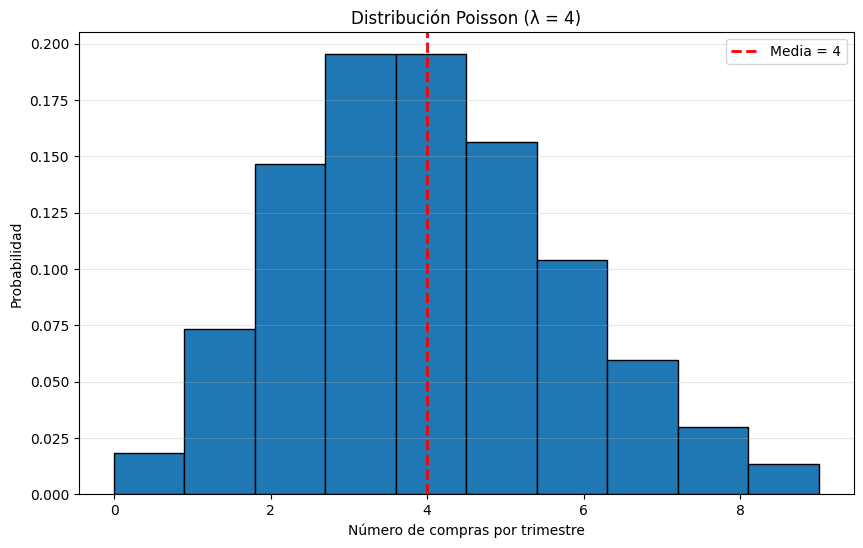

In [17]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

lambda_poisson = 4

media = lambda_poisson
varianza = lambda_poisson
desviacion_std = np.sqrt(varianza)
print(f'Media: {media}')
print(f'Varianza: {varianza}')
print(f'Desviación estándar: {desviacion_std:.2f}')

x_values = np.arange(0, 10)
probabilidades = poisson.pmf(x_values, lambda_poisson)

plt.figure(figsize=(10, 6))
plt.hist(x_values, weights=probabilidades, edgecolor='black')
plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media = {media}')
plt.title(f'Distribución Poisson (λ = {lambda_poisson})')
plt.xlabel('Número de compras por trimestre')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Segun lo que podemos ver en la grafica de distribucion Poisson con media y varianza igual a 4, podemos observar que la tendencia central se encuentra alrededor de 4 compras por cliente en un trimestre. La variabilidad es moderada, ya que la desviación estándar es igual a 2. La forma de la distribución es asimétrica positiva, con una cola que se extiende hacia la derecha, lo que indica que hay algunos clientes que realizan un número significativamente mayor de compras en comparación con la mayoría.

#### Inciso C

In [18]:
Li_95 = poisson.ppf(0.025, lambda_poisson)
Ls_95 = poisson.ppf(0.975, lambda_poisson)

print(f'Intervalo con cobertura (95): [{Li_95}, {Ls_95}]')

Intervalo con cobertura (95): [1.0, 8.0]


Para una covertura del 95%, el intervalo de probabilidad para el número de compras por cliente en un trimestre es aproximadamente [1, 8]. Esto significa que hay una alta probabilidad de que un cliente realice entre 1 y 8 compras en ese período.

#### Inciso D

In [19]:
prob_mas_10 = 1 - poisson.cdf(10, lambda_poisson)
print(f'Probabilidad de más de 10 compras: {prob_mas_10:.6f}')

Probabilidad de más de 10 compras: 0.002840


Es muy poco probable que un cliente haga más de 10 compras en ese trimestre, y esto se podia prever desde la grafica de la distribucion Poisson y el calculo de la cobertura del 95%, ya que en estos se puede observar que la mayoria de los clientes realizan entre 1 y 8 compras, y la probabilidad de que un cliente haga más de 10 compras es muy baja.

---

### 4. En el proceso de envasado de un producto alimenticio, se tiene que el peso neto ideal debe ser 1000 gramos, y norma oficial NOM-002-SCFI (2012) establece que la discrepancia máxima tolerada para estos casos es de ±15 g. De acuerdo a datos histórico se tiene que el peso neto del producto envasado, X, sigue una distribución normal con $\mu$=995 y $\sigma$=4. Conteste.
- a. Represente gráficamente la densidad de probabilidad f(x); y agregue líneas verticales en las tolerancias. Con base en esto, ¿qué puede decir del cumplimiento de la norma?
- b. Calcule la probabilidad de que el producto tenga un peso menor a lo establecido por la norma.
- c. Si se quisiera mejorar el cumplimiento de la norma, ¿cuál debería ser la prioridad, reducir la variabilidad o centrar el proceso (que la media coincida con el peso ideal)?
- d. ¿Entre qué valores se ubica el 95% de los pesos de este producto? Se sugiere resolverlo con cuantiles apropiados de la distribución.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

peso_ideal = 1000
tolerancia = 15

tolerancia_inferior = peso_ideal - tolerancia
tolerancia_superior = peso_ideal + tolerancia

mu = 995
sigma = 4

print(f'Parametros del proceso:')
print(f'Media: {mu}')
print(f'Desviación estandar: {sigma}')
print(f'Peso ideal: {peso_ideal}')
print(f'Tolerancia: ±{tolerancia}')
print(f'Rango permitido: [{tolerancia_inferior}, {tolerancia_superior}]')

Parametros del proceso:
Media: 995
Desviación estandar: 4
Peso ideal: 1000
Tolerancia: ±15
Rango permitido: [985, 1015]


#### Inciso A

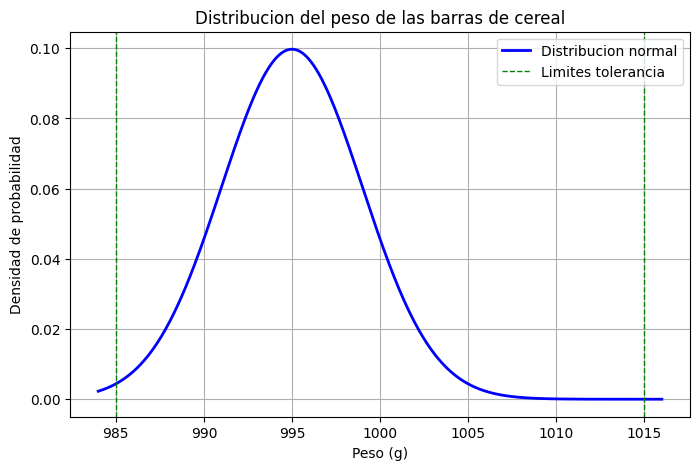

In [21]:
plt.figure(figsize=(8, 5))
x = np.linspace(peso_ideal - 4*sigma, peso_ideal + 4*sigma, 1000)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'b-', linewidth=2, label='Distribucion normal')
plt.axvline(x=tolerancia_inferior, color='green', linestyle='--', linewidth=1, label='Limites tolerancia')
plt.axvline(x=tolerancia_superior, color='green', linestyle='--', linewidth=1)
plt.title('Distribucion del peso de las barras de cereal')
plt.xlabel('Peso (g)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid()
plt.show()

De acuerdo a la grafica de distribucion del peso de las barras de cereal, podemos observr que la mayor parte de la distribucion se encuentra dentro de los limites establecidos por la norma, esto simpelemente a manera visual, mas delante podremos ver los valores exactos.

#### Inciso B

In [22]:
prob_peso_menor = stats.norm.cdf(tolerancia_inferior, mu, sigma)
print(f'Probabilidad de que una barra pese menos de {tolerancia_inferior} g: {prob_peso_menor:.4f}')

Probabilidad de que una barra pese menos de 985 g: 0.0062


En cuanto a la probabilidad de que el producto tenga un peso menor a lo establecido por la norma, se puede calcular utilizando la función de distribución acumulativa (CDF) de la distribución normal. Los resultados de esta funcion nos dicen que la probabilidad de que una barra pese menos de 985 g es aproximadamente 0.0062 (o 0.62%).

### Inciso C
Si se centrara el proceso para que la media coincida con el peso ideal de 1000 g, manteniendo la misma desviación estándar, la probabilidad de que una barra pese menos de 985 g se reduciría bastante. Vamos a ver un ejemplo:

In [23]:
mu_centrado = 1000
sigma_mismo = 4

prob_peso_menor_centrado = stats.norm.cdf(tolerancia_inferior, mu_centrado, sigma_mismo)
print(f'Probabilidad de que una barra pese menos de {tolerancia_inferior} g (media centrada): {prob_peso_menor_centrado:.4f}')

Probabilidad de que una barra pese menos de 985 g (media centrada): 0.0001


Podemos ver que al centrar la media en 1000 g, la probabilidad de que una barra pese menos de 985 g disminuye significativamente a aproximadamente 0.0001 (0.01%). Esto indica que centrar el proceso es una estrategia más efectiva para mejorar el cumplimiento de la norma en comparación con simplemente reducir la variabilidad manteniendo la media en 995 g.

### Inciso D

In [24]:
Li_95 = mu - 1.96 * sigma
Ls_95 = mu + 1.96 * sigma
print(f'Intervalo con cobertura del 95%: [{Li_95}, {Ls_95}]')

Intervalo con cobertura del 95%: [987.16, 1002.84]


Solamente con los valores dados con una cobertura del 95%, los pesos de las barras de cereal se encuentran entre aproximadamente 987.16 g y 1002.84 g, lo cual esta dentro de los limites establecidos por la norma. Pero vamos a verlo en una grafica:

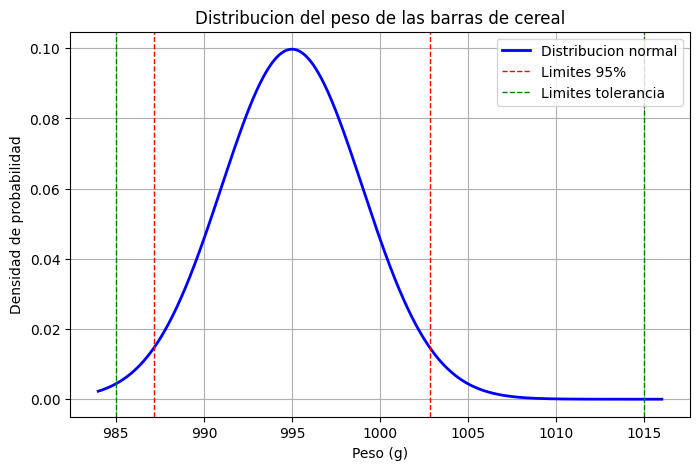

In [25]:
plt.figure(figsize=(8, 5))
x = np.linspace(peso_ideal - 4*sigma, peso_ideal + 4*sigma, 1000)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'b-', linewidth=2, label='Distribucion normal')
plt.axvline(x=Li_95, color='red', linestyle='--', linewidth=1, label='Limites 95%')
plt.axvline(x=Ls_95, color='red', linestyle='--', linewidth=1)
plt.axvline(x=tolerancia_inferior, color='green', linestyle='--', linewidth=1, label='Limites tolerancia')
plt.axvline(x=tolerancia_superior, color='green', linestyle='--', linewidth=1)
plt.title('Distribucion del peso de las barras de cereal')
plt.xlabel('Peso (g)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid()
plt.show()

De acuerdo a la grafica, las barras de cereal que se encuentran dentro del intervalo del 95% (lineas rojas) estan dentro de los limites establecidos por la norma (lineas verdes).